Column Names in the Dataset:
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Cleaned Column Names:
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    ob

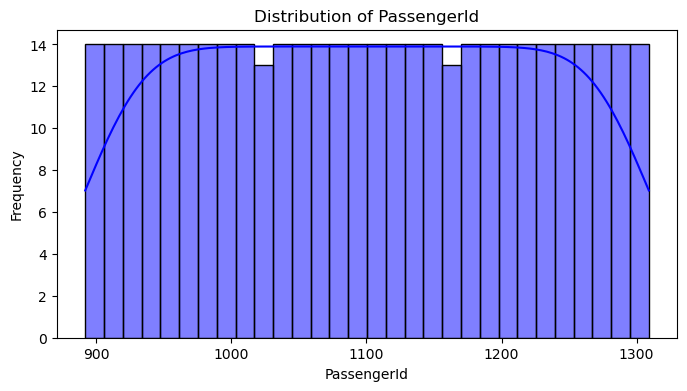

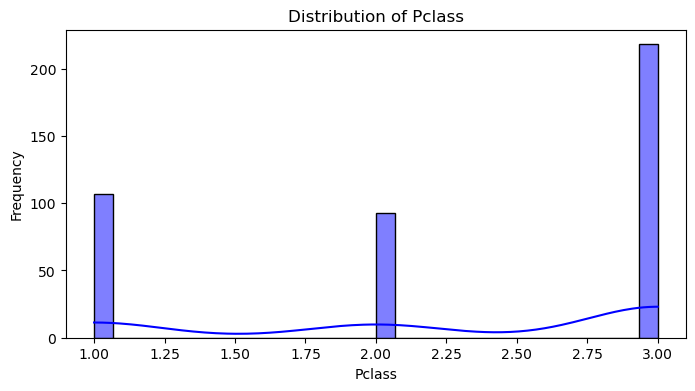

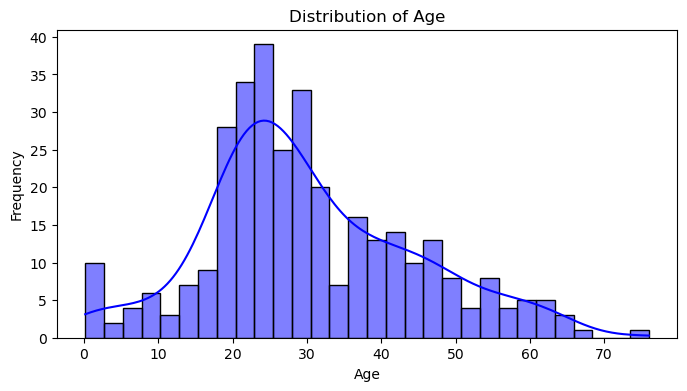

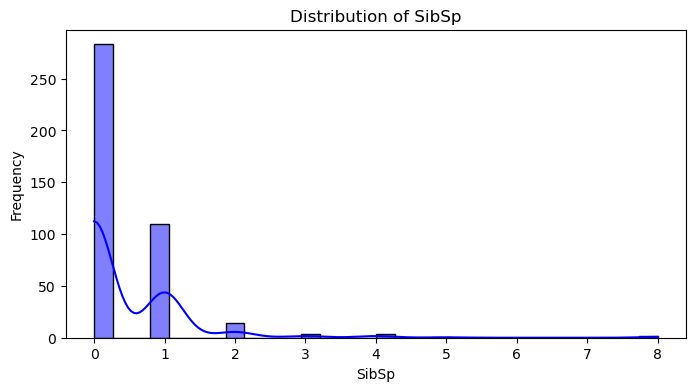

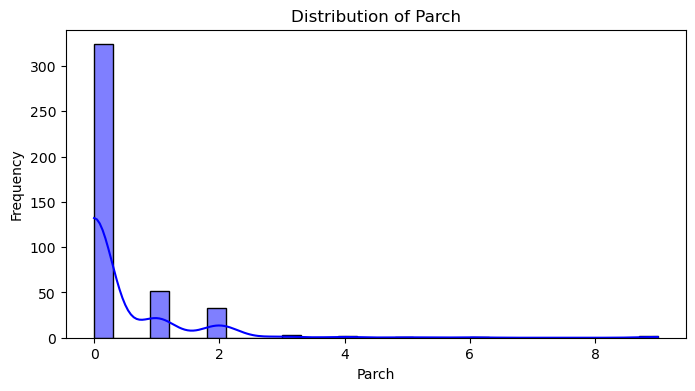

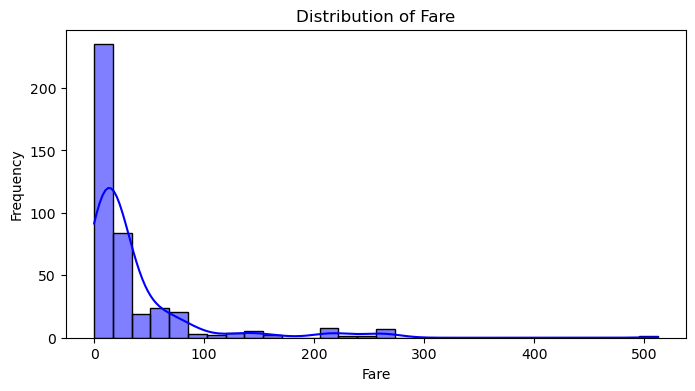

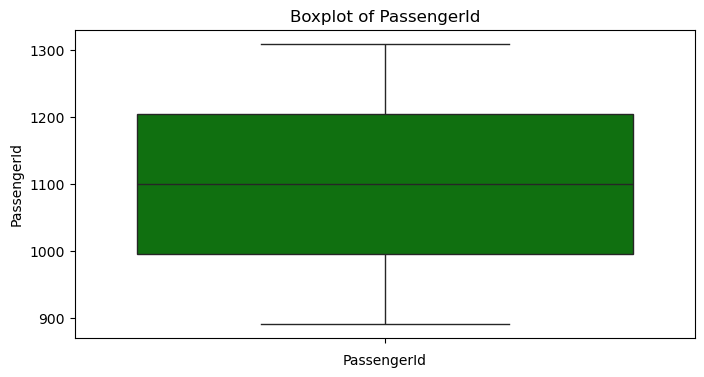

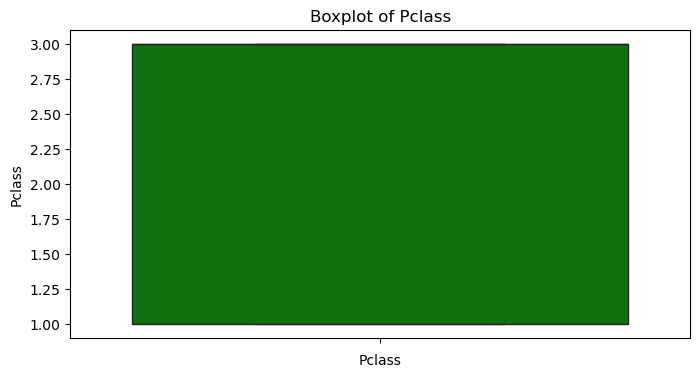

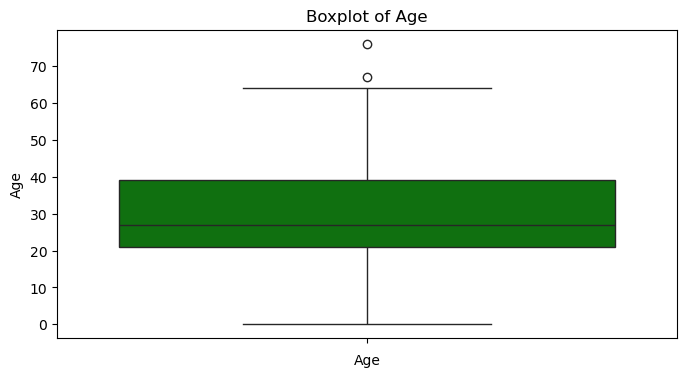

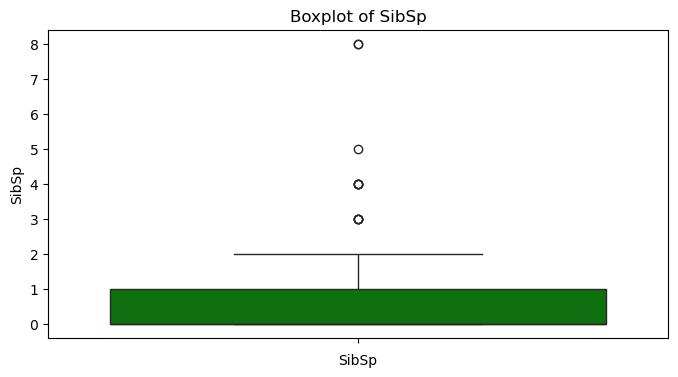

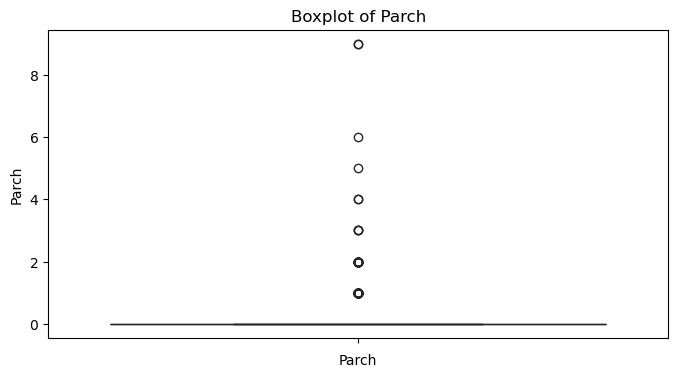

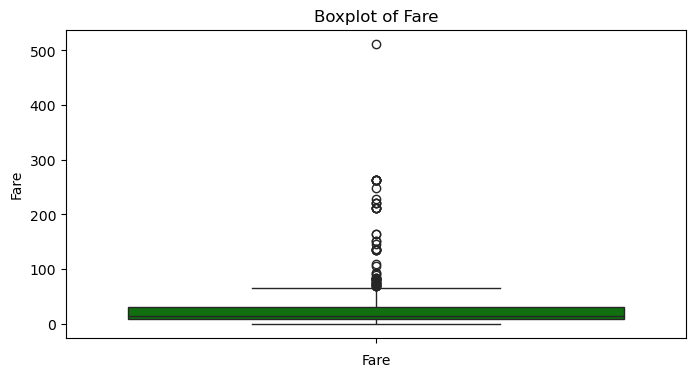

Target variable 'Survived' is not present in the dataset.


In [11]:
# Logistic Regression Analysis on Titanic Dataset

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the Titanic dataset
file_path = r"C:\Users\User\Downloads\Logistic Regression\Logistic Regression\Titanic_test.csv"  # Path of the uploaded Titanic dataset
data = pd.read_csv(file_path)

# Inspect and clean column names
print("Column Names in the Dataset:")
print(data.columns)
data.columns = data.columns.str.strip()  # Remove any extra spaces
print("\nCleaned Column Names:")
print(data.columns)

# Display basic dataset information
print("Dataset Information:")
data.info()
print("\nFirst Five Rows:")
print(data.head())

# Step 1: Exploratory Data Analysis (EDA)
print("\nStatistical Summary:")
print(data.describe())

# Visualizations
# Histograms for numerical variables
numerical_columns = data.select_dtypes(include=[np.number]).columns
for column in numerical_columns:
    if column in data.columns:  # Check if the column exists
        plt.figure(figsize=(8, 4))
        sns.histplot(data[column], kde=True, bins=30, color='blue')
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()

# Boxplots for numerical variables
for column in numerical_columns:
    if column in data.columns:  # Check if the column exists
        plt.figure(figsize=(8, 4))
        sns.boxplot(data[column], color='green')
        plt.title(f"Boxplot of {column}")
        plt.xlabel(column)
        plt.show()

# Step 2: Data Preprocessing
# Handle missing values
numeric_columns = data.select_dtypes(include=[np.number]).columns  # Numeric columns
categorical_columns = data.select_dtypes(include=['object']).columns  # Categorical columns

# Fill missing numeric values with the median
for col in numeric_columns:
    if data[col].isnull().sum() > 0:  # Check if there are missing values
        data[col] = data[col].fillna(data[col].median())

# Fill missing categorical values with the mode
for col in categorical_columns:
    if data[col].isnull().sum() > 0:  # Check if there are missing values
        data[col] = data[col].fillna(data[col].mode()[0])

# Encode categorical variables
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features (X) and target variable (y)
X = data.drop(columns=['Survived'], errors='ignore')  # Drop the target column if it exists
y = data['Survived'] if 'Survived' in data.columns else None

# Step 3: Split the dataset into training and testing sets
if y is not None:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    X_train, X_test, y_train, y_test = X, None, None, None

# Standardize numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
if X_test is not None:
    X_test = scaler.transform(X_test)

# Step 4: Build Logistic Regression Model
if y is not None:
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print("\nLogistic Regression Model:")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
else:
    print("Target variable 'Survived' is not present in the dataset.")
